# **Introducción al Análisis Exploratorio de Datos**

### 0. Importar librerías

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

### 1. Cargar conjunto de datos

In [ ]:
#Al ejecutar esta celda, Google colab lo va a llevar a su cuenta de google,
#y le va a pedir que copie y pegue un código un código de acceso en un recuadro.
# No necesario si esta el archivo localmente

from google.colab import drive
drive.mount('/gdrive')

In [ ]:
# Se va a utilizar el conjunto de datos titanic
# https://www.kaggle.com/c/titanic/data?select=train.csv
# No necesario si esta el archivo localmente

df = pd.read_csv('/gdrive/MyDrive/Programming/Datasets/titanic.csv')

In [9]:
# Se va a utilizar el conjunto de datos titanic
# Ejecuta si se tiene el archivo localmente

df = pd.read_csv('datasets/titanic.csv')

In [11]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


### 2. Análisis Exploratorio de Datos (EDA)

#### 2a. Conocimiento básico del dataset

Para lograr un conocimiento básico del dataset se puede plantear identificar lo siguiente:

*   a. ¿Qué representa cada uno de los atributos del dataset? Esto se puede realizar viendo la documentación del conujunto de datos.
*   b. Número de observaciones y Número de atributos.
*   c. Nombre y tipo de cada uno de los atributos.
*   d. ¿Cuáles atributos toman valores discretos y cuáles atributos toman valores continuos?
*   e. Visualizar un subconjunto de de observaciones del conjunto de datos.

In [12]:
df.shape

(891, 12)

In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
# Cantidad de valores nulos por columna

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# Porcentaje de valores nulos por columna
obs, _ = df.shape
df.isnull().sum()*100/obs

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [19]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### 2b. Análisis Univariado

Incluye:
+ Medidas de tendencia central: media, mediana, moda.
+ Medidas de dispersión: rango, variance, valor máximo y mínimo, cuartiles (incluyendo rango intercuartil) y desviación estándar.
+ Para variables numéricas discretas y categóricas: cantidad de valores únicos, valor con mayor frecuencia, etc.

También se pueden se pueden usar gráficos como:
+ Histogramas.
+ Para variables numéricas discretas y categóricas: gráficos de barras, gráficos circulares.

In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


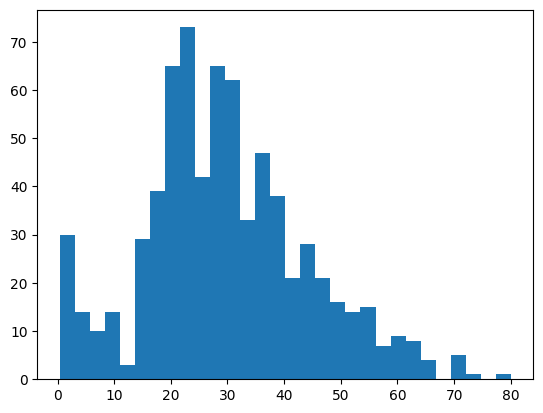

In [22]:
# Histograma con matplotlib

variable = 'Age'
bins = 30

plt.hist(df[variable], bins = bins)
plt.show()

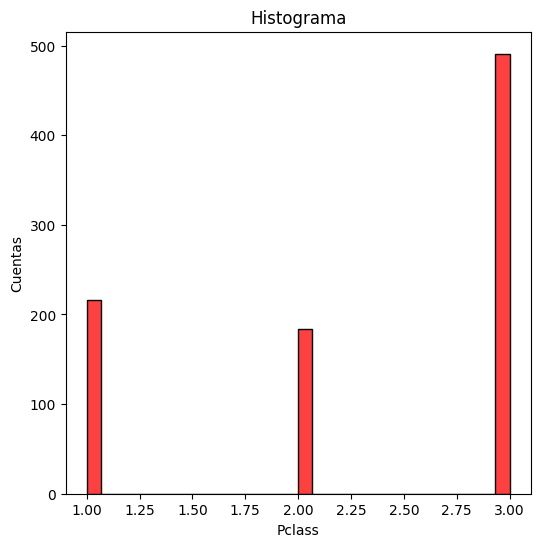

In [23]:
# Histograma

column = 'Pclass'
plt.figure(figsize=(6,6))
sns.histplot(data = df,
             x = column,
             bins = 30,
             color = 'red',
             fill = True,
             stat = 'count')    #'count' muestra el número de observaciones.
                                #'frequency' muestra el número de observaciones dividida por el ancho del bin.
                                #'density' normaliza las cuentas tal que el área del histograma es 1.
                                #'probability' normaliza las cuentas tal que la suma de la altura de las barras es 1.

plt.xlabel(column) #Texto en el eje x.
plt.ylabel('Cuentas')              #Texto en el eje y.
plt.title('Histograma')             #Título del gráfico.
plt.show()

In [24]:
# Función para calcular Outliers

def outliers(df, atributo):
    ax = sns.boxplot(x=df[atributo])
    plt.show()

    arr1 = df[atributo].values
    arr1 = arr1[~np.isnan(arr1)]

    # Encontrar el 1st quartil
    q1 = np.quantile(arr1, 0.25)

    # Encontrar el 3rd quartil
    q3 = np.quantile(arr1, 0.75)

    # Encontrar el 2nd quartil
    med = np.median(arr1)

    # Encontrar el rango inter quartil (iqr)
    iqr = q3-q1

    # Encontrar los bigotes superior e inferior
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    outliers_l = arr1[(arr1 <= lower_bound)]
    outliers_u = arr1[(arr1 >= upper_bound)]
    print(f'The lower bound is {lower_bound}')
    print(f'The upper bound is {upper_bound}')
    print('The number of lower outliers is {}'.format(len(outliers_l)))
    print('The following are the lower outliers in {} : {}'.format(atributo,outliers_l))
    print('The number of upper outliers is {}'.format(len(outliers_u)))
    print('The following are the upper outliers in {} : {}'.format(atributo,outliers_u))

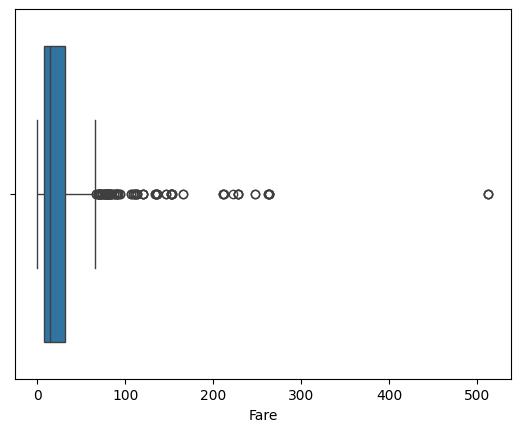

The lower bound is -26.724
The upper bound is 65.6344
The number of lower outliers is 0
The following are the lower outliers in Fare : []
The number of upper outliers is 116
The following are the upper outliers in Fare : [ 71.2833 263.     146.5208  82.1708  76.7292  80.      83.475   73.5
 263.      77.2875 247.5208  73.5     77.2875  79.2     66.6     69.55
  69.55   146.5208  69.55   113.275   76.2917  90.      83.475   90.
  79.2     86.5    512.3292  79.65   153.4625 135.6333  77.9583  78.85
  91.0792 151.55   247.5208 151.55   110.8833 108.9     83.1583 262.375
 164.8667 134.5     69.55   135.6333 153.4625 133.65    66.6    134.5
 263.      75.25    69.3    135.6333  82.1708 211.5    227.525   73.5
 120.     113.275   90.     120.     263.      81.8583  89.1042  91.0792
  90.      78.2667 151.55    86.5    108.9     93.5    221.7792 106.425
  71.     106.425  110.8833 227.525   79.65   110.8833  79.65    79.2
  78.2667 153.4625  77.9583  69.3     76.7292  73.5    113.275  133.65


In [25]:
outliers(df, 'Fare')

In [26]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [27]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

#### 2c. Análisis Bivariado

Es una técnica estadística que se aplica a un par de variables (atributos o características) para determinar la relación empírica entre ellas.

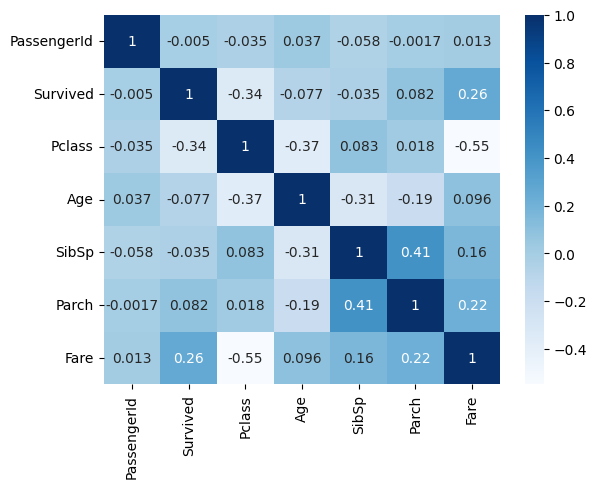

In [28]:
# Matriz de correlación
# Vamos a crear un DataFrame solo con las columnas numéricas

df_num = df.select_dtypes(include='number')

df_num.corr()

# Vamos a graficar la matriz de correlación como un mapa de calor

sns.heatmap(df_num.corr(), annot=True, cmap='Blues')
plt.show()

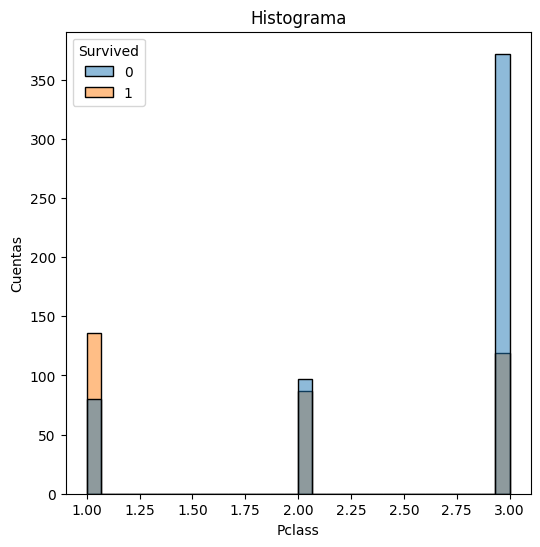

In [29]:
# Histograma

column = 'Pclass'
plt.figure(figsize=(6,6))
sns.histplot(data = df,
             x = column,
             hue = 'Survived',
             bins = 30,
             color = 'red',
             fill = True,
             stat = 'count')    #'count' muestra el número de observaciones.
                                #'frequency' muestra el número de observaciones dividida por el ancho del bin.
                                #'density' normaliza las cuentas tal que el área del histograma es 1.
                                #'probability' normaliza las cuentas tal que la suma de la altura de las barras es 1.

plt.xlabel(column) #Texto en el eje x.
plt.ylabel('Cuentas')              #Texto en el eje y.
plt.title('Histograma')             #Título del gráfico.
plt.show()

### Pregunta 1:

¿Porcentaje de hombres y mujeres que sobrevivieron?

In [30]:
filtro_1 = df['Sex'] == 'male'
print(filtro_1)

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: Sex, Length: 891, dtype: bool


In [31]:
df_male = df[filtro_1]

df_female = df[df['Sex'] == 'female']

In [32]:
df_male.shape

(577, 12)

In [33]:
num_hombres = df_male.shape[0]
num_mujeres = df_female.shape[0]

print(f'El número de hombres es {num_hombres}')
print(f'El número de mujeres es {num_mujeres}')

El número de hombres es 577
El número de mujeres es 314


In [34]:
df_male_survived = df_male[df_male['Survived'] == 1]
df_male_no_survived = df_male[df_male['Survived'] == 0]

df_female_survived = df_female[df_female['Survived'] == 1]
df_female_no_survived = df_female[df_female['Survived'] == 0]

In [27]:
num_hombres_survived = df_male_survived.shape[0]
num_mujeres_survived = df_female_survived.shape[0]

print(f'El porcentaje de hombres que sobrevivieron es {100*num_hombres_survived/num_hombres:.2f} %')
print(f'El número de mujeres que sobrevivieron es {100*num_mujeres_survived/num_mujeres:.2f} %')

El porcentaje de hombres que sobrevivieron es 18.89 %
El número de mujeres que sobrevivieron es 74.20 %


In [35]:
cantidad_h_s = df[ (df['Sex']=='male') & (df['Survived']==1) ].shape[0]
cantidad_h = df[ (df['Sex']=='male') ].shape[0]
porcentaje = (cantidad_h_s/cantidad_h)*100
print(f"{porcentaje:.2f}")

18.89


Pregunta

¿Cuál es el promedio de edad de los hombres?
¿Cuál es el promedio de edad de las mujeres?
(En general, y de los que sobrevivieron y no sobrevivieron)

In [36]:
media_hombres = df_male['Age'].mean()

print(f'La media de la edad de los hombres es {media_hombres:.2f} años')

La media de la edad de los hombres es 30.73 años


In [37]:
media_mujeres = df_female['Age'].mean()

print(f'La media de la edad de las mujeres es {media_mujeres:.2f} años')

La media de la edad de las mujeres es 27.92 años


In [38]:
media_hombres_survived = df_male_survived['Age'].mean()
media_hombres_no_survived = df_male_no_survived['Age'].mean()

print(f'El promedio de la edad de los hombres que sobrevivieron es {media_hombres_survived:.2f} años')
print(f'El promedio de la edad de los hombres que no sobrevivieron es {media_hombres_no_survived:.2f} años')

El promedio de la edad de los hombres que sobrevivieron es 27.28 años
El promedio de la edad de los hombres que no sobrevivieron es 31.62 años


In [39]:
mediana_hombres_survived = df_male_survived['Age'].median()
mediana_hombres_no_survived = df_male_no_survived['Age'].median()

print(f'La mediana de la edad de los hombres que sobrevivieron es {mediana_hombres_survived:.2f} años')
print(f'La mediana de la edad de los hombres que no sobrevivieron es {mediana_hombres_no_survived:.2f} años')

La mediana de la edad de los hombres que sobrevivieron es 28.00 años
La mediana de la edad de los hombres que no sobrevivieron es 29.00 años


In [40]:
mayor_edad = df_male['Age'].max()

print(mayor_edad)

80.0


In [41]:
hombre_mayor = df_male[df_male['Age']==mayor_edad]

print(hombre_mayor)

     PassengerId  Survived  Pclass                                  Name  \
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   

      Sex   Age  SibSp  Parch Ticket  Fare Cabin Embarked  
630  male  80.0      0      0  27042  30.0   A23        S  


In [42]:
fare_max = df['Fare'].max()
print(fare_max)

512.3292


In [43]:
mayor_fare = df[df['Fare']==fare_max]
print(tabulate(mayor_fare, headers = 'keys', tablefmt = 'fancy_grid'))

╒═════╤═══════════════╤════════════╤══════════╤════════════════════════════════════╤════════╤═══════╤═════════╤═════════╤══════════╤═════════╤═════════════╤════════════╕
│     │   PassengerId │   Survived │   Pclass │ Name                               │ Sex    │   Age │   SibSp │   Parch │ Ticket   │    Fare │ Cabin       │ Embarked   │
╞═════╪═══════════════╪════════════╪══════════╪════════════════════════════════════╪════════╪═══════╪═════════╪═════════╪══════════╪═════════╪═════════════╪════════════╡
│ 258 │           259 │          1 │        1 │ Ward, Miss. Anna                   │ female │    35 │       0 │       0 │ PC 17755 │ 512.329 │ nan         │ C          │
├─────┼───────────────┼────────────┼──────────┼────────────────────────────────────┼────────┼───────┼─────────┼─────────┼──────────┼─────────┼─────────────┼────────────┤
│ 679 │           680 │          1 │        1 │ Cardeza, Mr. Thomas Drake Martinez │ male   │    36 │       0 │       1 │ PC 17755 │ 512.329 │ B51 B53

In [44]:
hombre_mayor = df_male.loc[df_male['Age']==mayor_edad]

print(hombre_mayor)

     PassengerId  Survived  Pclass                                  Name  \
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   

      Sex   Age  SibSp  Parch Ticket  Fare Cabin Embarked  
630  male  80.0      0      0  27042  30.0   A23        S  


In [45]:
## Vamos a analizar lo que pasó con el hombre de menor edad

menor_edad = df_male['Age'].min()

print(menor_edad)

0.42


In [46]:
hombre_menor = df_male.loc[df_male['Age']==menor_edad]

print(hombre_menor)

     PassengerId  Survived  Pclass                             Name   Sex  \
803          804         1       3  Thomas, Master. Assad Alexander  male   

      Age  SibSp  Parch Ticket    Fare Cabin Embarked  
803  0.42      0      1   2625  8.5167   NaN        C  


In [47]:
## Vamos a hacer lo mismo para las mujeres

media_mujeres_survived = df_female_survived['Age'].mean()
media_mujeres_no_survived = df_female_no_survived['Age'].mean()

print(f'El promedio de la edad de las mujeres que sobrevivieron es {media_mujeres_survived:.2f} años')
print(f'El promedio de la edad de las mujeres que no sobrevivieron es {media_mujeres_no_survived:.2f} años')

El promedio de la edad de las mujeres que sobrevivieron es 28.85 años
El promedio de la edad de las mujeres que no sobrevivieron es 25.05 años


In [48]:
## Vamos a analizar qué pasó con la mujer de mayor edad

mayor_edad_f = df_female['Age'].max()

print(mayor_edad_f)

mujer_mayor = df_female[df_female['Age']==mayor_edad_f]

print(mujer_mayor)

63.0
     PassengerId  Survived  Pclass                               Name     Sex  \
275          276         1       1  Andrews, Miss. Kornelia Theodosia  female   
483          484         1       3             Turkula, Mrs. (Hedwig)  female   

      Age  SibSp  Parch Ticket     Fare Cabin Embarked  
275  63.0      1      0  13502  77.9583    D7        S  
483  63.0      0      0   4134   9.5875   NaN        S  


In [49]:
print(tabulate(mujer_mayor, headers = 'keys', tablefmt = 'fancy_grid'))

╒═════╤═══════════════╤════════════╤══════════╤═══════════════════════════════════╤════════╤═══════╤═════════╤═════════╤══════════╤═════════╤═════════╤════════════╕
│     │   PassengerId │   Survived │   Pclass │ Name                              │ Sex    │   Age │   SibSp │   Parch │   Ticket │    Fare │ Cabin   │ Embarked   │
╞═════╪═══════════════╪════════════╪══════════╪═══════════════════════════════════╪════════╪═══════╪═════════╪═════════╪══════════╪═════════╪═════════╪════════════╡
│ 275 │           276 │          1 │        1 │ Andrews, Miss. Kornelia Theodosia │ female │    63 │       1 │       0 │    13502 │ 77.9583 │ D7      │ S          │
├─────┼───────────────┼────────────┼──────────┼───────────────────────────────────┼────────┼───────┼─────────┼─────────┼──────────┼─────────┼─────────┼────────────┤
│ 483 │           484 │          1 │        3 │ Turkula, Mrs. (Hedwig)            │ female │    63 │       0 │       0 │     4134 │  9.5875 │ nan     │ S          │
╘═════╧═══

In [50]:
print(tabulate(df_male, headers = 'keys', tablefmt = 'fancy_grid'))

╒═════╤═══════════════╤════════════╤══════════╤═══════════════════════════════════════════════════╤═══════╤════════╤═════════╤═════════╤════════════════════╤══════════╤═════════════╤════════════╕
│     │   PassengerId │   Survived │   Pclass │ Name                                              │ Sex   │    Age │   SibSp │   Parch │ Ticket             │     Fare │ Cabin       │ Embarked   │
╞═════╪═══════════════╪════════════╪══════════╪═══════════════════════════════════════════════════╪═══════╪════════╪═════════╪═════════╪════════════════════╪══════════╪═════════════╪════════════╡
│   0 │             1 │          0 │        3 │ Braund, Mr. Owen Harris                           │ male  │  22    │       1 │       0 │ A/5 21171          │   7.25   │ nan         │ S          │
├─────┼───────────────┼────────────┼──────────┼───────────────────────────────────────────────────┼───────┼────────┼─────────┼─────────┼────────────────────┼──────────┼─────────────┼────────────┤
│   4 │             

### Pregunta 2:

¿Porcentaje de hombres y mujeres que sobrevivieron por clase?

Paso a paso:

1. Obtener el número de los hombres y mujeres del conjunto de datos
2. Obtener el número de hombres que viajaban en cada clase.
3. Obtener el número de hombres que sobrevivieron y no sobrevivieron por cada clase.
4. Calcular el porcentaje por cada clase.
5. Obtener el número de mujeres que viajaban en cada clase.
3. Obtener el númer de mujeres que sobrevivieron y no sobrevivieron por cada clase.
4. Calcular el porcentaje por cada clase.

In [51]:
## Paso 1

num_hombres = df[df['Sex']=='male'].shape[0]
print(num_hombres)

577


In [52]:
df_male = df[df['Sex']=='male']
print(df_male.shape[0])

577


In [53]:
num_mujeres = df[df['Sex']=='female'].shape[0]
print(num_mujeres)

314


In [55]:
## Paso 2

filtro = (df['Sex']=='male') & (df['Pclass']==1)
num_hom_c1 = df[filtro].shape[0]
print(f'La cantidad de hommbres que viajaban en primera clase es {num_hom_c1}')

filtro = (df['Sex']=='male') & (df['Pclass']==2)
num_hom_c2 = df[filtro].shape[0]
print(f'La cantidad de hommbres que viajaban en segunda clase es {num_hom_c2}')

filtro = (df['Sex']=='male') & (df['Pclass']==3)
num_hom_c3 = df[filtro].shape[0]
print(f'La cantidad de hommbres que viajaban en tercera clase es {num_hom_c3}')

#print(num_hom_c1+num_hom_c2+num_hom_c3)

La cantidad de hommbres que viajaban en primera clase es 122
La cantidad de hommbres que viajaban en segunda clase es 108
La cantidad de hommbres que viajaban en tercera clase es 347


In [87]:
## Paso 3

filtro = (df['Sex']=='male') & (df['Pclass']==1) & (df['Survived']==1)
num_hom_c1_s = df[filtro].shape[0]
print(f'La cantidad de hombres que viajaban en primera clase y sobrevivió es {num_hom_c1_s}')

filtro = (df['Sex']=='male') & (df['Pclass']==2) & (df['Survived']==1)
num_hom_c2_s = df[filtro].shape[0]
print(f'La cantidad de hombres que viajaban en segunda clase y sobrevivió es {num_hom_c2_s}')

filtro = (df['Sex']=='male') & (df['Pclass']==3) & (df['Survived']==1)
num_hom_c3_s = df[filtro].shape[0]
print(f'La cantidad de hombres que viajaban en tercera clase y sobrevivió es {num_hom_c3_s}')

La cantidad de hombres que viajaban en primera clase y sobrevivió es 45
La cantidad de hombres que viajaban en segunda clase y sobrevivió es 17
La cantidad de hombres que viajaban en tercera clase y sobrevivió es 47


In [88]:
## Paso 4
porcentaje_h_c1_s = (100 * num_hom_c1_s)/num_hom_c1
print(f'El porcentaje de hombres que viajaban en primera clase y sobrevivió es {porcentaje_h_c1_s:.2f}')

porcentaje_h_c2_s = (100 * num_hom_c2_s)/num_hom_c2
print(f'El porcentaje de hombres que viajaban en segunda clase y sobrevivió es {porcentaje_h_c2_s:.2f}')

porcentaje_h_c3_s = (100 * num_hom_c3_s)/num_hom_c3
print(f'El porcentaje de hombres que viajaban en tercera clase y sobrevivió es {porcentaje_h_c3_s:.2f}')

El porcentaje de hombres que viajaban en primera clase y sobrevivió es 36.89
El porcentaje de hombres que viajaban en segunda clase y sobrevivió es 15.74
El porcentaje de hombres que viajaban en tercera clase y sobrevivió es 13.54


In [81]:
## Paso 1

num_mujeres = df[df['Sex']=='female'].shape[0]
print(num_mujeres)

314


In [82]:
## Paso 2

filtro = (df['Sex']=='female') & (df['Pclass']==1)
num_mujeres_c1 = df[filtro].shape[0]
print(f'La cantidad de mujeres que viajaban en primera clase es {num_mujeres_c1}')

filtro = (df['Sex']=='female') & (df['Pclass']==2)
num_mujeres_c2 = df[filtro].shape[0]
print(f'La cantidad de mujeres que viajaban en segunda clase es {num_mujeres_c2}')

filtro = (df['Sex']=='female') & (df['Pclass']==3)
num_mujeres_c3 = df[filtro].shape[0]
print(f'La cantidad de mujeres que viajaban en tercera clase es {num_mujeres_c3}')

La cantidad de mujeres que viajaban en primera clase es 94
La cantidad de mujeres que viajaban en segunda clase es 76
La cantidad de mujeres que viajaban en tercera clase es 144


In [2]:
## Paso 3

filtro = (df['Sex']=='female') & (df['Pclass']==1) & (df['Survived']==1)
num_mujeres_c1_s = df[filtro].shape[0]
print(f'La cantidad de mujeres que viajaban en primera clase y sobrevivió es {num_mujeres_c1_s}')

filtro = (df['Sex']=='female') & (df['Pclass']==2) & (df['Survived']==1)
num_mujeres_c2_s = df[filtro].shape[0]
print(f'La cantidad de mujeres que viajaban en segunda clase y sobrevivió es {num_mujeres_c2_s}')

filtro = (df['Sex']=='female') & (df['Pclass']==3) & (df['Survived']==1)
num_mujeres_c3_s = df[filtro].shape[0]
print(f'La cantidad de mujeres que viajaban en tercera clase y sobrevivió es {num_mujeres_c3_s}')

NameError: name 'df' is not defined

In [86]:
## Paso 4
porcentaje_mujeres_c1_s = (100 * num_mujeres_c1_s)/num_mujeres_c1
print(f'El porcentaje de mujeres que viajaban en primera clase y sobrevivió es {porcentaje_mujeres_c1_s:.2f}')
porcentaje_mujeres_c2_s = (100 * num_mujeres_c2_s)/num_mujeres_c2
print(f'El porcentaje de mujeres que viajaban en segunda clase y sobrevivió es {porcentaje_mujeres_c2_s:.2f}')
porcentaje_mujeres_c3_s = (100 * num_mujeres_c3_s)/num_mujeres_c3
print(f'El porcentaje de mujeres que viajaban en tercera clase y sobrevivió es {porcentaje_mujeres_c3_s:.2f}')

El porcentaje de mujeres que viajaban en primera clase y sobrevivió es 96.81
El porcentaje de mujeres que viajaban en segunda clase y sobrevivió es 92.11
El porcentaje de mujeres que viajaban en tercera clase y sobrevivió es 50.00


### Pregunta 3:

¿Cuál es la distribución de las edades de los hombres que sobrevivieron?

Paso a Paso

1. Crear un nuevo DataFrame con los hombres que sobrevivieron
2. Analizar la distribución de las edades: calcular estadísticas básicas, generar el histograma, construir el boxplot

In [78]:
## Paso 1

filtro = (df['Sex']=='male') &(df['Survived']==1)
df_male_s = df[filtro]

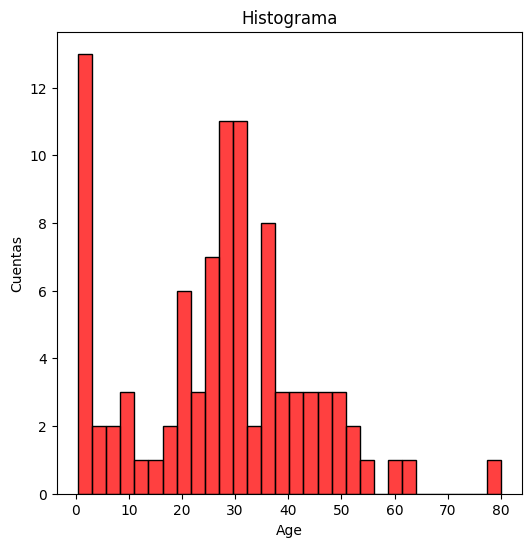

In [60]:
## Paso 2
# Histograma

column = 'Age'
plt.figure(figsize=(6,6))
sns.histplot(data = df_male_s,
             x = column,
             #hue = 'Survived',
             bins = 30,
             color = 'red',
             fill = True,
             stat = 'count')    #'count' muestra el número de observaciones.
                                #'frequency' muestra el número de observaciones dividida por el ancho del bin.
                                #'density' normaliza las cuentas tal que el área del histograma es 1.
                                #'probability' normaliza las cuentas tal que la suma de la altura de las barras es 1.

plt.xlabel(column) #Texto en el eje x.
plt.ylabel('Cuentas')              #Texto en el eje y.
plt.title('Histograma')             #Título del gráfico.
plt.show()

In [61]:
df_male_s['Age'].describe()

count    93.000000
mean     27.276022
std      16.504803
min       0.420000
25%      18.000000
50%      28.000000
75%      36.000000
max      80.000000
Name: Age, dtype: float64

In [62]:
filtro = (df['Sex']=='female') &(df['Survived']==1)
df_female_s = df[filtro]

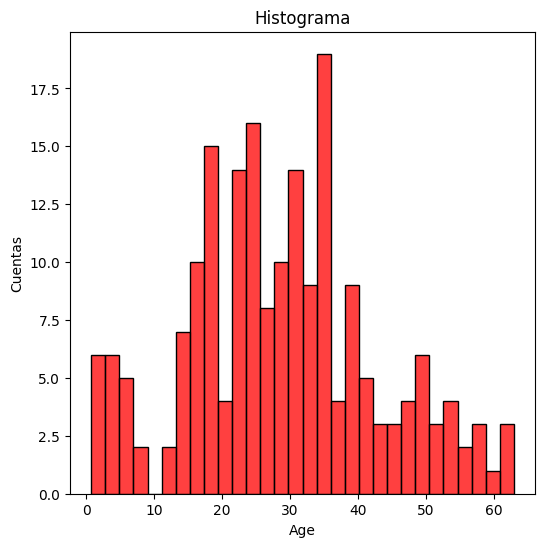

In [63]:
## Paso 2
# Histograma

column = 'Age'
plt.figure(figsize=(6,6))
sns.histplot(data = df_female_s,
             x = column,
             #hue = 'Survived',
             bins = 30,
             color = 'red',
             fill = True,
             stat = 'count')    #'count' muestra el número de observaciones.
                                #'frequency' muestra el número de observaciones dividida por el ancho del bin.
                                #'density' normaliza las cuentas tal que el área del histograma es 1.
                                #'probability' normaliza las cuentas tal que la suma de la altura de las barras es 1.

plt.xlabel(column) #Texto en el eje x.
plt.ylabel('Cuentas')              #Texto en el eje y.
plt.title('Histograma')             #Título del gráfico.
plt.show()

### Pregunta 4:

¿Tiene alguna influencia el puerto dónde embarcó en sobrevivir o no?

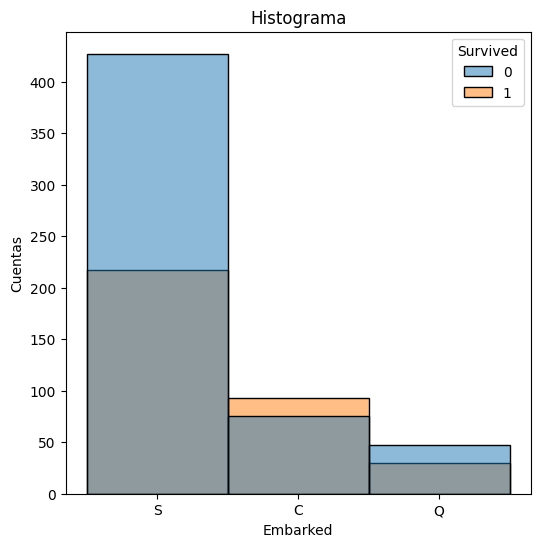

In [64]:
## Paso 2
# Histograma

column = 'Embarked'
plt.figure(figsize=(6,6))
sns.histplot(data = df,
             x = column,
             hue = 'Survived',
             bins = 30,
             color = 'red',
             fill = True,
             stat = 'count')    #'count' muestra el número de observaciones.
                                #'frequency' muestra el número de observaciones dividida por el ancho del bin.
                                #'density' normaliza las cuentas tal que el área del histograma es 1.
                                #'probability' normaliza las cuentas tal que la suma de la altura de las barras es 1.

plt.xlabel(column) #Texto en el eje x.
plt.ylabel('Cuentas')              #Texto en el eje y.
plt.title('Histograma')             #Título del gráfico.
plt.show()

### Pregunta 5:

Hagan una pregunta que les parezca interesante contestar con los datos.

¿La probabilidad de sobrevivir en el Titanic fue mayor para las mujeres independientemente de su clase social?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos del Titanic
datos = pd.read_csv('datasets/titanic.csv')

# Elegir solo las columnas que necesitamos
datos_filtrados = datos[['Sex', 'Pclass', 'Survived']]

# Agrupar por sexo y clase, y calcular el promedio de sobrevivencia
# (0 = no sobrevivió, 1 = sobrevivió → el promedio representa la tasa de supervivencia)
tasas = datos_filtrados.groupby(['Sex', 'Pclass']).mean(numeric_only=True)

# Mostrar los resultados como una tabla
print("Tasa de supervivencia por sexo y clase:")
print(tasas)

# Preparar los datos para el gráfico
# Usamos unstack para que cada sexo sea una línea separada
tasas_plot = tasas['Survived'].unstack()


Tasa de supervivencia por sexo y clase:
               Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447


Vamos a graficar los nombres y la cabina

In [75]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


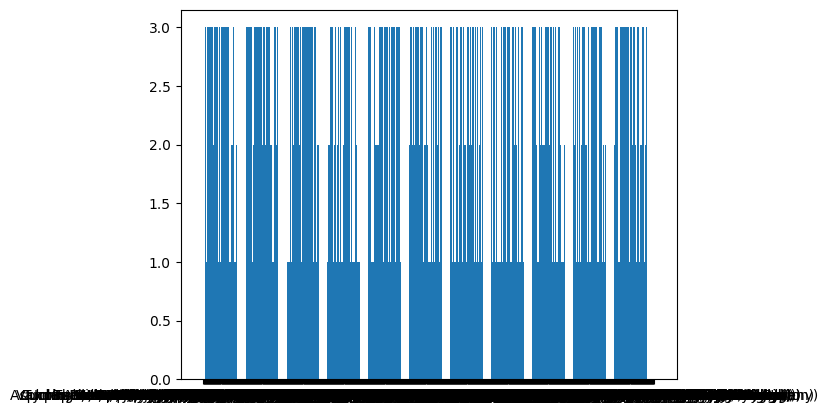

In [66]:
plt.bar(df['Name'],df['Pclass'])
plt.show()

In [67]:
Deporte = df.groupby(['Survived','Sex'])['Age'].mean()
Deporte

Survived  Sex   
0         female    25.046875
          male      31.618056
1         female    28.847716
          male      27.276022
Name: Age, dtype: float64

In [68]:
Deporte.index[0]

(np.int64(0), 'female')

In [69]:
valores = []
for i in range(len(Deporte)):
    if Deporte.index[i][1] == 'female':
        print(i)
        valores.append(Deporte[Deporte.index[i]])
valores

0
2


[np.float64(25.046875), np.float64(28.84771573604061)]

In [70]:
Deporte[(0, 'female')]

np.float64(25.046875)

In [ ]:
# Vamos a tomar los valores del índice Sex = female

a = Deporte[:,'Sex']
a